# Exercise 3 task 1

## part 1

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import scipy.misc
import cv2
import copy

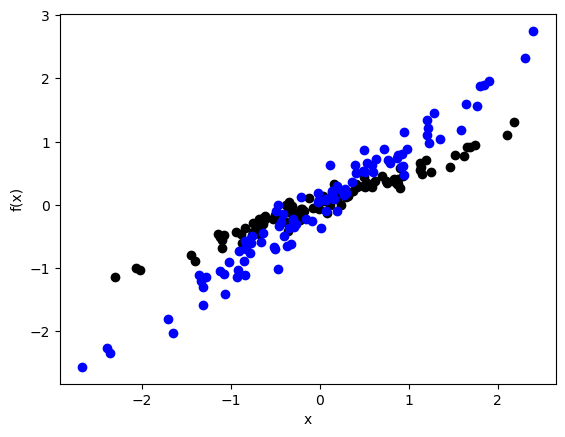

In [20]:
path="../data/pca_dataset.txt"
data = pd.read_csv(path, sep=" ", header=None).to_numpy()
X = preprocessing.scale(data)
plt.scatter(data[:, 0], data[:, 1],color='black')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.scatter(X[:, 0], X[:, 1],color='blue')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

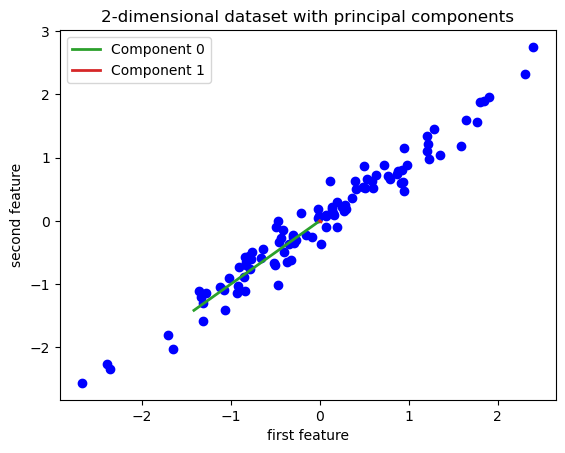

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]] [0.98973756 0.01026244] [1.99946982 0.0207322 ]


In [2]:
path="../data/pca_dataset.txt"
data = pd.read_csv(path, sep=" ", header=None).to_numpy()
X = preprocessing.scale(data)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1],color='blue')
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=2,
        color=f"C{i + 2}",
    )
plt.gca().set(
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()
print(pca.components_, pca.explained_variance_ratio_, pca.explained_variance_)


## Part 2

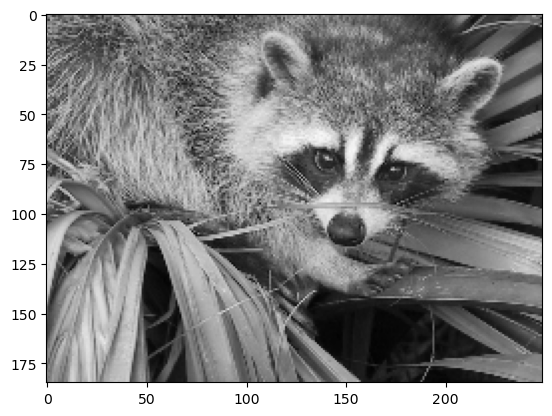

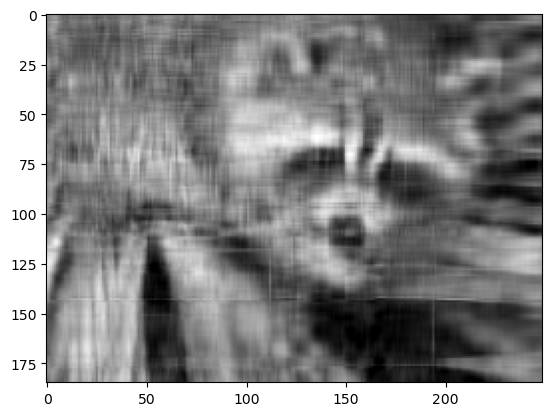

0.7437777189796696


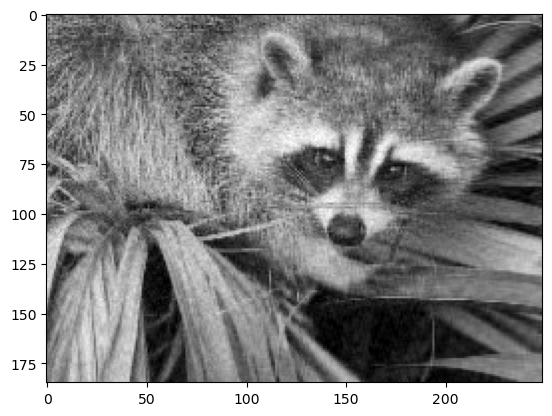

0.9277334864281261


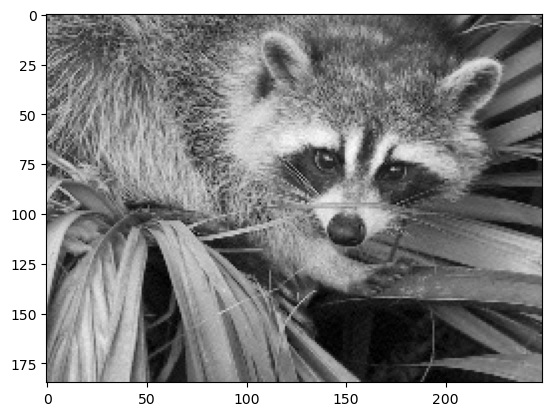

0.9915877133591258


In [5]:
img = scipy.misc.face(gray=True)
img = cv2.resize(img, dsize=(249, 185))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
for i in [10,50,120]:
    img_PCA = PCA(n_components=i).fit(img)
    img_NEW = img_PCA.transform(img)
    img_NEW = img_PCA.inverse_transform(img_NEW)
    plt.imshow(img_NEW,cmap='gray', vmin=0, vmax=255)
    plt.show()
    a = np.sum(img_PCA.explained_variance_ratio_)
    print(a)

## Part 3

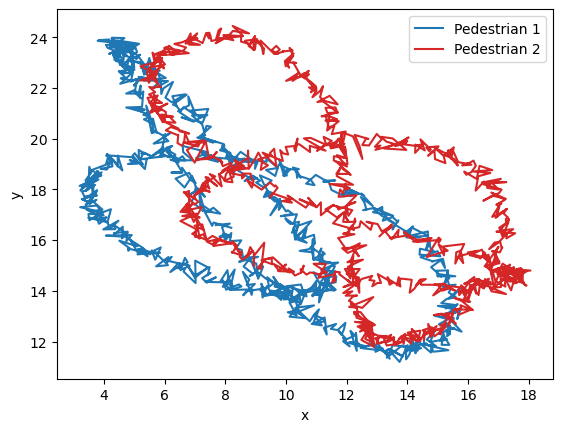

In [32]:
trajs_path ="../data/data_DMAP_PCA_vadere.txt"
trajs = pd.read_csv(trajs_path , header=None, sep=" ")
trajs.head()

ped1 = trajs.loc[:, 0:1].to_numpy()
ped2 = trajs.loc[:, 2:3].to_numpy()


plt.plot(ped1[:, 0], ped1[:, 1], label="Pedestrian 1", color='tab:blue')
plt.plot(ped2[:, 0], ped2[:, 1], label="Pedestrian 2", color='tab:red')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# plot the trajectories


In [10]:
trajs_path ="../data/data_DMAP_PCA_vadere.txt"
trajs = pd.read_csv(trajs_path , header=None, sep=" ")

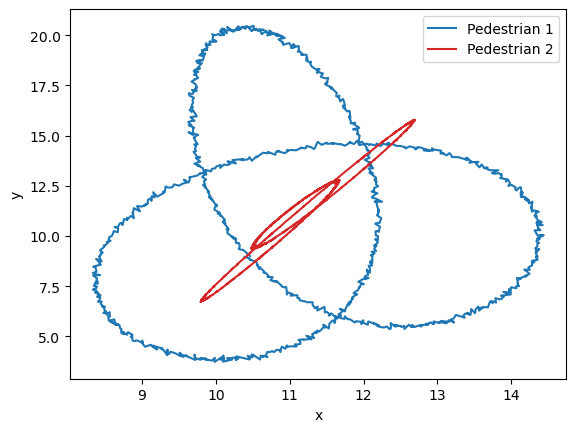

0.8492464226063752


In [30]:
trajs_1=trajs - np.mean(trajs, axis=0)
U, singular_values, V = np.linalg.svd(trajs_1.to_numpy())  # note that V is already transpose
    # starting from a vector containing the singular values, create the S matrix
S = np.vstack((
    np.diag(singular_values),
    np.zeros(shape=(trajs.shape[0] - len(singular_values), len(singular_values)))
))
S_2 = copy.deepcopy(S)
S_2[2:, 2:] = 0
reconstruction = U @ S_2 @ V.T + np.mean(trajs.to_numpy())
ped1 = reconstruction[:, 0:2]
ped2 = reconstruction[:, 2:4]
plt.plot(ped1[:, 0], ped1[:, 1], label="Pedestrian 1", color='tab:blue')
plt.plot(ped2[:, 0], ped2[:, 1], label="Pedestrian 2", color='tab:red')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
energy = np.sum(np.square(singular_values[0:2])) / np.sum(np.square(singular_values))
print(energy)

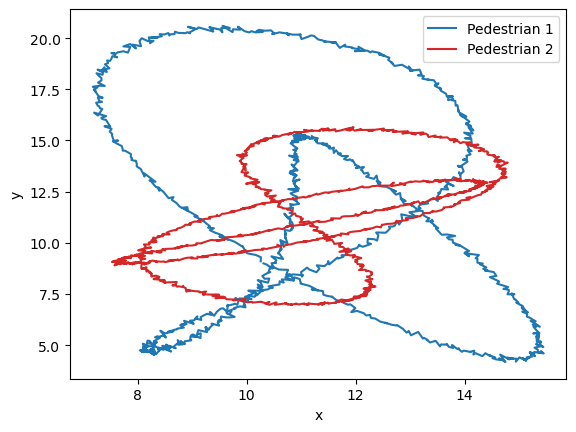

0.9971310341299299


In [31]:
S_3 = copy.deepcopy(S)
S_3[3:, 3:] = 0
reconstruction = U @ S_3 @ V.T + np.mean(trajs.to_numpy())
ped1 = reconstruction[:, 0:2]
ped2 = reconstruction[:, 2:4]
plt.plot(ped1[:, 0], ped1[:, 1], label="Pedestrian 1", color='tab:blue')
plt.plot(ped2[:, 0], ped2[:, 1], label="Pedestrian 2", color='tab:red')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
energy = np.sum(np.square(singular_values[0:3])) / np.sum(np.square(singular_values))
print(energy)

In [20]:
for n_components in range(0, len(singular_values)):
      energy = np.sum(np.square(singular_values[0:n_components])) / np.sum(np.square(singular_values))
      if energy >= 0.9:
            print(f"To retain at least 90% of the energy we need at least the first {n_components} principal components.")
            print(f"The first {n_components} principal components capture {round(energy * 100, 2)}% of the energy")
            break

To retain at least 90% of the energy we need at least the first 3 principal components.
The first 3 principal components capture 99.71% of the energy
